# Multi-Task Test
At first we have to install the newest version of fvGP

In [1]:
##First, install the newest version of fvgp
#!pip install fvgp~=4.7.3
#!pip install plotly

## Setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from fvgp import GP
import plotly.graph_objects as go
from itertools import product
import plotly.io as pio
pio.renderers.default = "png"
%load_ext autoreload
%autoreload 2

## Simple 1d Example

### Data

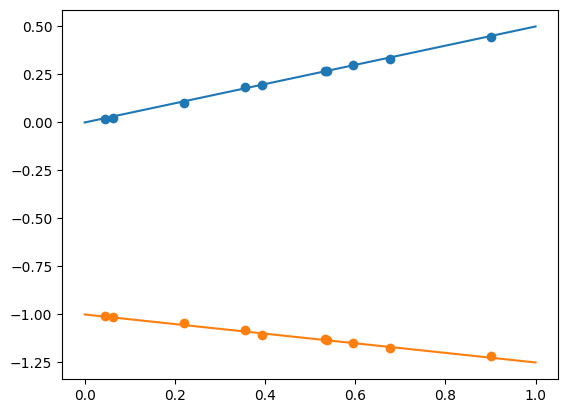

In [3]:
def f1(x): return 0.5 * x
def f2(x): return (-.25 * x) - 1.

x_pred1d = np.linspace(0,1,50)
plt.plot(x_pred1d,f1(x_pred1d))
plt.plot(x_pred1d,f2(x_pred1d))
x_data = np.random.rand(10)
y_data1 = f1(x_data) + np.random.uniform(low = -0.01, high = 0.01, size =len(x_data))
y_data2 = f2(x_data) + np.random.uniform(low = -0.01, high = 0.01, size =len(x_data))
plt.scatter(x_data,y_data1) 
plt.scatter(x_data,y_data2) 
plt.show()

### GP initialization

In [4]:
from fvgp import fvGP

my_gp2 = fvGP(x_data.reshape(len(x_data),1), np.column_stack([y_data1, y_data2]))
print("Global Training in progress")
my_gp2.train(max_iter = 20, info=True)




Global Training in progress
Finished  10  out of  20  MCMC iterations. f(x)=  43.93801926227358


/home/marcus/Coding/fvGP/fvgp/gp.py:265: UserWarning:

Hyperparameters initialized to a vector of ones.

/home/marcus/Coding/fvGP/fvgp/gp.py:299: UserWarning:

No noise function or measurement noise provided. Noise variances will be set to (0.01 * mean(|y_data|))^2.

/home/marcus/Coding/fvGP/fvgp/gp.py:581: UserWarning:

Default hyperparameter_bounds initialized because none were provided. This will fail for custom kernel, mean, or noise functions



array([0.72713779, 2.667378  , 0.02282108])

In [5]:
print(my_gp2.x_data)
print(my_gp2.y_data)

[[0.21969632 0.        ]
 [0.67822974 0.        ]
 [0.39338162 0.        ]
 [0.53768463 0.        ]
 [0.90107951 0.        ]
 [0.3552601  0.        ]
 [0.04446481 0.        ]
 [0.53254495 0.        ]
 [0.59485203 0.        ]
 [0.06274843 0.        ]
 [0.21969632 1.        ]
 [0.67822974 1.        ]
 [0.39338162 1.        ]
 [0.53768463 1.        ]
 [0.90107951 1.        ]
 [0.3552601  1.        ]
 [0.04446481 1.        ]
 [0.53254495 1.        ]
 [0.59485203 1.        ]
 [0.06274843 1.        ]]
[ 0.10278164  0.33148297  0.19577228  0.26939934  0.4443221   0.18696836
  0.01852347  0.26807251  0.30028226  0.02225798 -1.04592364 -1.17354344
 -1.10818716 -1.13253365 -1.2153672  -1.08057904 -1.01004836 -1.12581116
 -1.14926989 -1.01366415]


### Predictions

In [6]:
y_test = np.hstack([f1(x_pred1d).reshape(len(x_pred1d),1),f2(x_pred1d).reshape(len(x_pred1d),1)])
print("RMSE:              ", my_gp2.rmse(x_pred1d.reshape(len(x_pred1d),1),y_test))
print("NLPD:              ", my_gp2.nlpd(x_pred1d.reshape(len(x_pred1d),1),y_test))
print("R2:                ", my_gp2.r2(x_pred1d.reshape(len(x_pred1d),1),y_test))
print("CRPS (mean, std):  ", my_gp2.crps(x_pred1d.reshape(len(x_pred1d),1),y_test))

RMSE:               0.006789467546383568
NLPD:               -3.7186050764996996
R2:                 0.9999051911572712
CRPS (mean, std):   (np.float64(0.0035299155603744133), np.float64(0.002464502160629648))


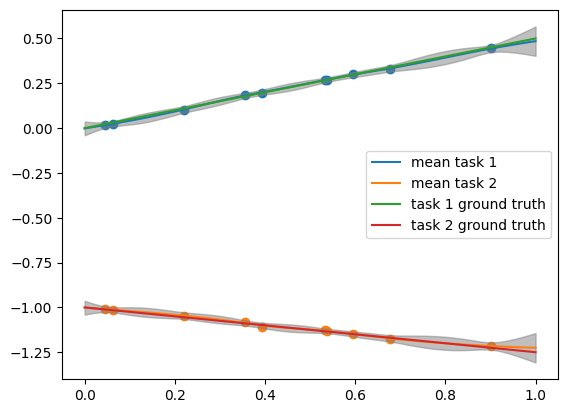

In [7]:
#mean and standard deviation
mean = my_gp2.posterior_mean(x_pred=x_pred1d.reshape(50,1))["m(x)"]
std = np.sqrt(my_gp2.posterior_covariance(x_pred=x_pred1d.reshape(50,1), x_out=np.array([0,1]))["v(x)"])


plt.plot(x_pred1d.reshape(50,1),mean[:,0], label = "mean task 1")
plt.plot(x_pred1d.reshape(50,1),mean[:,1], label = "mean task 2")
plt.scatter(x_data,y_data1) 
plt.scatter(x_data,y_data2) 
plt.plot(x_pred1d,f1(x_pred1d), label = "task 1 ground truth")
plt.plot(x_pred1d,f2(x_pred1d), label = "task 2 ground truth")
plt.fill_between(x_pred1d, mean[:,0] - 3. * std[:,0], mean[:,0] + 3. * std[:,0], alpha = 0.5, color = "grey")
plt.fill_between(x_pred1d, mean[:,1] - 3. * std[:,1], mean[:,1] + 3. * std[:,1], alpha = 0.5, color = "grey")
plt.legend()
plt.show()

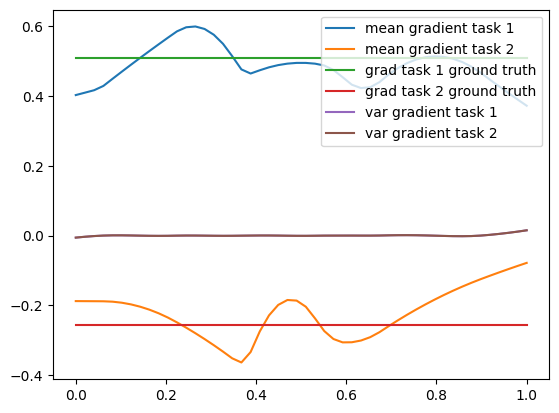

In [8]:
#mean gradient and variance gradient
mean_grad = my_gp2.posterior_mean_grad(x_pred=x_pred1d.reshape(50,1), x_out=np.array([0,1]))["dm/dx"]
var_grad = my_gp2.posterior_covariance_grad(x_pred=x_pred1d.reshape(50,1), x_out=np.array([0,1]))["dv/dx"]

plt.plot(x_pred1d.reshape(50,1),mean_grad[:,0,0], label = "mean gradient task 1")
plt.plot(x_pred1d.reshape(50,1),mean_grad[:,0,1], label = "mean gradient task 2")
plt.plot(x_pred1d,np.gradient(f1(x_pred1d), 1./50.), label = "grad task 1 ground truth")
plt.plot(x_pred1d,np.gradient(f2(x_pred1d), 1./50.), label = "grad task 2 ground truth")
plt.plot(x_pred1d.reshape(50,1),var_grad[:,0,0], label = "var gradient task 1")
plt.plot(x_pred1d.reshape(50,1),var_grad[:,0,1], label = "var gradient task 2")
plt.legend()
plt.show()

### What if some tasks are missing from the data

#### It works just fine, but we have to insert np.nan at positions of missing data, both for y and the variances. 

In [9]:
y_data = np.column_stack([y_data1, y_data2])
noise_variances = np.zeros(y_data.shape) + 0.01
y_data[2,0] = np.nan
noise_variances[2,0] = np.nan

y_data[6,1] = np.nan
noise_variances[6,1] = np.nan

my_gp2 = fvGP(x_data.reshape(len(x_data),1), y_data, noise_variances=noise_variances)
print("Global Training in progress")
my_gp2.train(max_iter = 20)

Global Training in progress


array([2.69165502, 5.10918688, 0.61167707])

## 3d Example

### Data

In [21]:
data = np.load("./data/sim_variable_mod.npy")
sparsification = 4

x_data3 = data[:,5:][::sparsification]
y_data3 = data[:,0:2][::sparsification]

#it is good practice to check the format of the data
print(x_data3.shape)
print(y_data3.shape)

(1583, 3)
(1583, 2)


In [22]:
index = np.where(x_data3[:,2] == 1200.)[0]
x_data3=x_data3[index,0:2]
y_data3=y_data3[index]

for i in range(x_data3.shape[1]):
    x_data3[:,i] = x_data3[:,i] - np.min(x_data3[:,i])
    x_data3[:,i] = x_data3[:,i] / np.max(x_data3[:,i])

In [23]:
x = np.linspace(0,1,100)
y = np.linspace(0,1,100)
x_pred3D = np.asarray(list(product(x, y)))

In [24]:
def scatter(x,y,z,size=3, color = 1):
    #if not color: color = z
    fig = go.Figure()
    fig.add_trace(go.Scatter3d(x=x, y=y, z=z,mode='markers',marker=dict(color=color, size = size)))
    
    
    fig.update_layout(autosize=False,
                  width=800, height=800,
                  font=dict(size=18,),
                  margin=dict(l=0, r=0, b=0, t=0))
    fig.show()

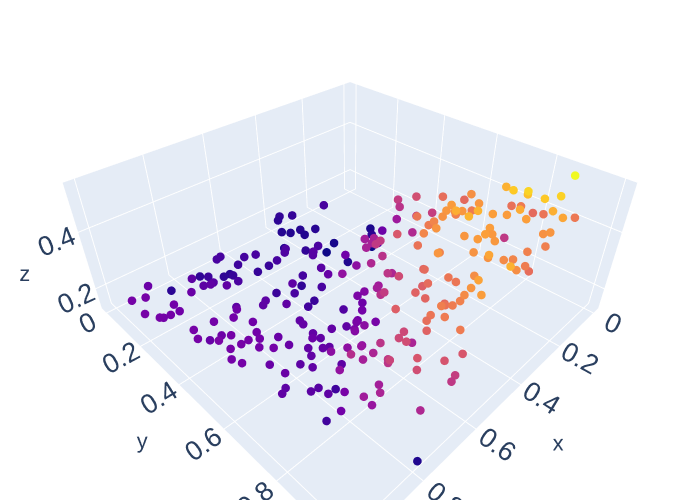

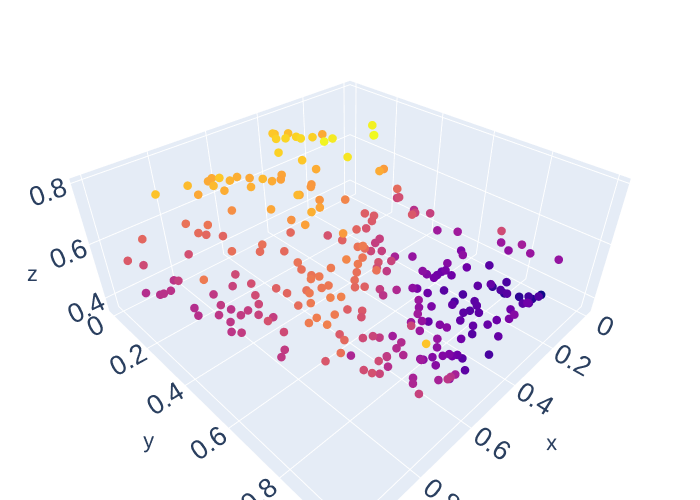

In [25]:
scatter(x_data3[:,0],x_data3[:,1],y_data3[:,0], size = 5, color = y_data3[:,0])
scatter(x_data3[:,0],x_data3[:,1],y_data3[:,1], size = 5, color = y_data3[:,1])

### Initialization

#### (a) Default behavior --- minimal

In [26]:
from fvgp import fvGP

my_gp2 = fvGP(x_data3,y_data3)
print("Global Training in progress")
my_gp2.train(max_iter = 2)

Global Training in progress


/home/marcus/Coding/fvGP/fvgp/gp.py:265: UserWarning:

Hyperparameters initialized to a vector of ones.

/home/marcus/Coding/fvGP/fvgp/gp.py:299: UserWarning:

No noise function or measurement noise provided. Noise variances will be set to (0.01 * mean(|y_data|))^2.

/home/marcus/Coding/fvGP/fvgp/gp.py:581: UserWarning:

Default hyperparameter_bounds initialized because none were provided. This will fail for custom kernel, mean, or noise functions



array([0.12427704, 5.73383201, 5.40785948, 0.87326744])

#### (b) Custom kernel
It is vital in the multi-task case to think hard about kernel design. The kernel is now a function
over X x X x T x T, where X is the input and T is the output space. Print the input of the kernel, it will have the dimensionality of this cartesian product space. 
The default kernel in fvgp is just a Matern kernel operating in this new space.

In [15]:
#A simple kernel that won't lead to good performance because it's stationary
from fvgp.kernels import *
def mkernel(x1,x2,hps):
    d = get_distance_matrix(x1,x2)
    return hps[0] * matern_kernel_diff1(d,hps[1])

In [16]:
my_gp2 = fvGP(x_data3,y_data3,
              init_hyperparameters=np.ones((2)), kernel_function=mkernel
             )
print("MCMC Training in progress")


bounds = np.array([[0.01,1.],[0.01,1.]])
my_gp2.train(hyperparameter_bounds=bounds,max_iter = 20)

MCMC Training in progress


array([0.10631216, 0.75910231])

#### (c) A custom deep kernel

In [30]:
from fvgp.deep_kernel_network import *
iset_dim = 3
gp_deep_kernel_layer_width = 5
n = Network(iset_dim, gp_deep_kernel_layer_width)
print(n.number_of_hps)

def deep_multi_task_kernel(x1, x2, hps):  # pragma: no cover
    signal_var = hps[0]
    length_scale = hps[1]
    hps_nn = hps[2:]
    w1_indices = np.arange(0, gp_deep_kernel_layer_width * iset_dim)
    last = gp_deep_kernel_layer_width * iset_dim
    w2_indices = np.arange(last, last + gp_deep_kernel_layer_width ** 2)
    last = last + gp_deep_kernel_layer_width ** 2
    w3_indices = np.arange(last, last + gp_deep_kernel_layer_width * iset_dim)
    last = last + gp_deep_kernel_layer_width * iset_dim
    b1_indices = np.arange(last, last + gp_deep_kernel_layer_width)
    last = last + gp_deep_kernel_layer_width
    b2_indices = np.arange(last, last + gp_deep_kernel_layer_width)
    last = last + gp_deep_kernel_layer_width
    b3_indices = np.arange(last, last + iset_dim)

    n.set_weights(hps_nn[w1_indices].reshape(gp_deep_kernel_layer_width, iset_dim),
                  hps_nn[w2_indices].reshape(gp_deep_kernel_layer_width, gp_deep_kernel_layer_width),
                  hps_nn[w3_indices].reshape(iset_dim, gp_deep_kernel_layer_width))
    n.set_biases(hps_nn[b1_indices].reshape(gp_deep_kernel_layer_width),
                 hps_nn[b2_indices].reshape(gp_deep_kernel_layer_width),
                 hps_nn[b3_indices].reshape(iset_dim))
    x1_nn = n.forward(x1)
    x2_nn = n.forward(x2)
    d = get_distance_matrix(x1_nn, x2_nn)
    k = signal_var * matern_kernel_diff1(d, length_scale)
    return k


my_gp2 = fvGP(x_data3,y_data3,
              init_hyperparameters=np.ones((n.number_of_hps+2))*0.1, kernel_function=deep_multi_task_kernel
             )
print("Global Training in progress")


bounds = np.zeros((n.number_of_hps+2,2))
bounds[0] = np.array([0.01,1.])
bounds[1] = np.array([0.1,1.])
bounds[2:] = np.array([-1,1])
my_gp2.train(hyperparameter_bounds=bounds,max_iter = 1000, method = "mcmc")

68
Global Training in progress


/home/marcus/Coding/fvGP/fvgp/gp.py:299: UserWarning:

No noise function or measurement noise provided. Noise variances will be set to (0.01 * mean(|y_data|))^2.



array([ 4.24304097e-01,  1.29753852e-01,  4.05596641e-02, -1.22085863e-01,
       -5.05754361e-01,  2.38773518e-03,  1.62018101e-01,  1.55800178e-01,
       -1.89783351e-01,  5.15681787e-01, -3.73024878e-01,  5.24707844e-02,
        2.05751282e-01,  3.74384285e-01,  5.56056918e-01,  3.14124237e-01,
        2.12392162e-01,  9.14078320e-02, -3.17749365e-01, -3.52262285e-01,
       -1.83025049e-01,  7.09418916e-01, -4.06492019e-01,  4.71220634e-01,
        4.42259878e-04,  5.34479064e-01,  1.02034221e-01,  8.49077905e-01,
        7.29438958e-01,  3.53716600e-01,  3.24009825e-01, -3.42108394e-01,
        1.27955761e-01,  3.06458561e-01, -5.76641608e-01, -5.09547473e-02,
        5.45709319e-01, -1.04439122e-01,  2.44842909e-01,  4.92858799e-01,
        3.31652758e-01,  4.87455263e-01, -3.16209616e-01,  4.17881853e-01,
        1.30570721e-01,  5.21686370e-01,  4.59040831e-01, -4.90121960e-01,
        2.45962471e-01,  2.38228084e-01,  2.28889038e-02,  5.51640077e-01,
        2.64904768e-01,  

### Prediction

In [31]:
mean = my_gp2.posterior_mean(x_pred3D)["m(x)"]
var =  my_gp2.posterior_covariance(x_pred3D)["v(x)"]

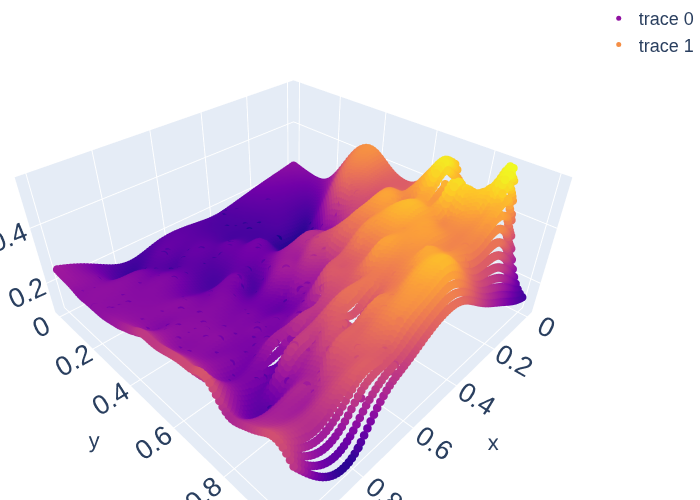

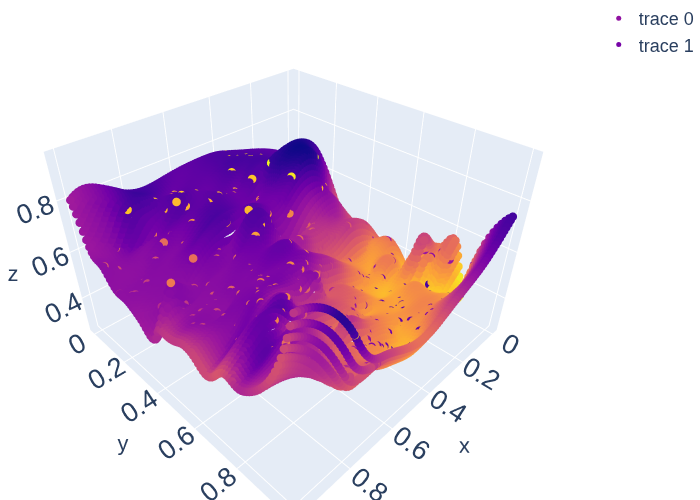

In [32]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=x_pred3D[:,0],y=x_pred3D[:,1], z=mean[:,0],
                             mode='markers',marker=dict(color=mean[:,0], size = 5)))
fig.add_trace(go.Scatter3d(x=x_data3[:,0], y=x_data3[:,1] , z=y_data3[:,0],
                           mode='markers',marker=dict(color=y_data3[:,0], size = 5)))
fig.update_layout(autosize=False,
                  width=800, height=800,
                  font=dict(size=18,),
                  margin=dict(l=0, r=0, b=0, t=0))
fig.show()



fig = go.Figure()
fig.add_trace(go.Scatter3d(x=x_pred3D[:,0],y=x_pred3D[:,1], z=mean[:,1],
                             mode='markers',marker=dict(color=mean[:,0], size = 5)))
fig.add_trace(go.Scatter3d(x=x_data3[:,0], y=x_data3[:,1] , z=y_data3[:,1],
                           mode='markers',marker=dict(color=y_data3[:,1], size = 5)))
fig.update_layout(autosize=False,
                  width=800, height=800,
                  font=dict(size=18,),
                  margin=dict(l=0, r=0, b=0, t=0))
fig.show()
